In [1]:
# https://translated.turbopages.org/proxy_u/en-ru.ru.a5a945b1-65ff4b80-c08c64aa-74722d776562/https/www.geeksforgeeks.org/cleaning-data-with-pyspark-python/

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("work/my_data.csv", sep=",")
data.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,...,1650223560,2022-04-17T15:26:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,8940,947,coach
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650200400,2022-04-17T09:00:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9000,947,coach
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650218700,2022-04-17T14:05:00.000-04:00,BOS,ATL,Delta,DL,Boeing 757-200,9000,947,coach
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,...,1650227460,2022-04-17T16:31:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9120,947,coach
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,...,1650213180,2022-04-17T12:33:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9240,947,coach


In [4]:
line_count = data.shape[0]
column_count = data.shape[1]
print("Всего строк: {}".format(line_count))
print("Всего колонок: {}".format(column_count))

Всего строк: 99
Всего колонок: 27


In [5]:
!pip install pyspark;

In [6]:

import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains\
, isnan, udf, hour, array_min, array_max, countDistinct
from pyspark.sql.types import *

In [7]:
MAX_MEMORY = '15G'
# Initialize a spark session.
conf = pyspark.SparkConf().setMaster("local[*]") \
        .set('spark.executor.heartbeatInterval', 10000) \
        .set('spark.network.timeout', 10000) \
        .set("spark.core.connection.ack.wait.timeout", "3600") \
        .set("spark.executor.memory", MAX_MEMORY) \
        .set("spark.driver.memory", MAX_MEMORY)
def init_spark():
    spark = SparkSession \
        .builder \
        .appName("My pyspark") \
        .config(conf=conf) \
        .getOrCreate()
    return spark

spark = init_spark()
path = "work/my_data.csv"
df = spark.read.option("delimiter", ",").option("header", True).csv(path)
show_result = df.toPandas()
show_result.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,...,1650223560,2022-04-17T15:26:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,8940,947,coach
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650200400,2022-04-17T09:00:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9000,947,coach
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650218700,2022-04-17T14:05:00.000-04:00,BOS,ATL,Delta,DL,Boeing 757-200,9000,947,coach
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,...,1650227460,2022-04-17T16:31:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9120,947,coach
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,...,1650213180,2022-04-17T12:33:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9240,947,coach


In [8]:
df.printSchema()

root
 |-- legId: string (nullable = true)
 |-- searchDate: string (nullable = true)
 |-- flightDate: string (nullable = true)
 |-- startingAirport: string (nullable = true)
 |-- destinationAirport: string (nullable = true)
 |-- fareBasisCode: string (nullable = true)
 |-- travelDuration: string (nullable = true)
 |-- elapsedDays: string (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isRefundable: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- baseFare: string (nullable = true)
 |-- totalFare: string (nullable = true)
 |-- seatsRemaining: string (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- segmentsDepartureTimeEpochSeconds: string (nullable = true)
 |-- segmentsDepartureTimeRaw: string (nullable = true)
 |-- segmentsArrivalTimeEpochSeconds: string (nullable = true)
 |-- segmentsArrivalTimeRaw: string (nullable = true)
 |-- segmentsArrivalAirportCode: string (nullable = true)
 |-- segmentsDepartureAirportCode: str

In [9]:
df.head(3)

[Row(legId='9ca0e81111c683bec1012473feefd28f', searchDate='2022-04-16', flightDate='2022-04-17', startingAirport='ATL', destinationAirport='BOS', fareBasisCode='LA0NX0MC', travelDuration='PT2H29M', elapsedDays='0', isBasicEconomy='False', isRefundable='False', isNonStop='True', baseFare='217.67', totalFare='248.60', seatsRemaining='9', totalTravelDistance='947', segmentsDepartureTimeEpochSeconds='1650214620', segmentsDepartureTimeRaw='2022-04-17T12:57:00.000-04:00', segmentsArrivalTimeEpochSeconds='1650223560', segmentsArrivalTimeRaw='2022-04-17T15:26:00.000-04:00', segmentsArrivalAirportCode='BOS', segmentsDepartureAirportCode='ATL', segmentsAirlineName='Delta', segmentsAirlineCode='DL', segmentsEquipmentDescription='Airbus A321', segmentsDurationInSeconds='8940', segmentsDistance='947', segmentsCabinCode='coach'),
 Row(legId='98685953630e772a098941b71906592b', searchDate='2022-04-16', flightDate='2022-04-17', startingAirport='ATL', destinationAirport='BOS', fareBasisCode='LA0NX0MC', 

In [10]:
df.limit(5).toPandas().T

,0,1,2,3,4
legId,9ca0e81111c683bec1012473feefd28f,98685953630e772a098941b71906592b,98d90cbc32bfbb05c2fc32897c7c1087,969a269d38eae583f455486fa90877b4,980370cf27c89b40d2833a1d5afc9751
searchDate,2022-04-16,2022-04-16,2022-04-16,2022-04-16,2022-04-16
flightDate,2022-04-17,2022-04-17,2022-04-17,2022-04-17,2022-04-17
startingAirport,ATL,ATL,ATL,ATL,ATL
destinationAirport,BOS,BOS,BOS,BOS,BOS
fareBasisCode,LA0NX0MC,LA0NX0MC,LA0NX0MC,LA0NX0MC,LA0NX0MC
travelDuration,PT2H29M,PT2H30M,PT2H30M,PT2H32M,PT2H34M
elapsedDays,0,0,0,0,0
isBasicEconomy,False,False,False,False,False
isRefundable,False,False,False,False,False


In [11]:
#Detect missing values and abnormal zeroes


In [12]:
print('Columns overview')
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

Columns overview


,Column Name,Data type
0,legId,string
1,searchDate,string
2,flightDate,string
3,startingAirport,string
4,destinationAirport,string
5,fareBasisCode,string
6,travelDuration,string
7,elapsedDays,string
8,isBasicEconomy,string
9,isRefundable,string


In [13]:
missing_values = {} 
for index, column in enumerate(df.columns):
     if column in df.columns:    # check string columns with None and Null values
#         missing_count = df.filter(col(column).eqNullSafe(None) | col(column).isNull()).count()
#         missing_values.update({column: missing_count})
        missing_count = df.filter(col(column).eqNullSafe(None) | col(column).isNull()).count()
missing_df = pd.DataFrame.from_dict([missing_values])
missing_df

""
0


In [14]:
#Удаление всех выбросов, где legID соответствует null

In [28]:
df = df.filter(df["legId"].isNotNull())
df.select(col("legId")).show()
print("Итоговое количество колонок в столбце legId:", df.count())

+--------------------+
|               legId|
+--------------------+
|9ca0e81111c683bec...|
|98685953630e772a0...|
|98d90cbc32bfbb05c...|
|969a269d38eae583f...|
|980370cf27c89b40d...|
|79eda9f841e226a1e...|
|9335fae376c38bb61...|
|3904bf87f2d1daf33...|
|d93988734c44a3c07...|
|562e7d5dd6ecbf150...|
|c38a6e4b807d15541...|
|f66d72ba3a5265766...|
|e7c4054e85cca9bc7...|
|5fa8c0f8b25eb24bf...|
|948d26b3e5658762c...|
|e1b95e4e6c997517f...|
|eaf033a044596f0a7...|
|721d9a2f66fe479e7...|
|a9f012defb9227f69...|
|676e25bb0ec021d33...|
+--------------------+
only showing top 20 rows

Итоговое количество колонок в столбце legId: 93


In [16]:
#Удаление всех выбросов, где totalTravelDistance соответствует null

In [29]:
df = df.filter(df["totalTravelDistance"].isNotNull())
df.select(col("totalTravelDistance")).show()
print("Итоговое количество колонок в столбце totalTravelDistance:", df.count())

+-------------------+
|totalTravelDistance|
+-------------------+
|                947|
|                947|
|                947|
|                947|
|                947|
|                947|
|                956|
|                956|
|                956|
|                956|
|                947|
|               1462|
|               1462|
|               1462|
|               1462|
|                947|
|                956|
|                956|
|                956|
|                956|
+-------------------+
only showing top 20 rows

Итоговое количество колонок в столбце totalTravelDistance: 93


In [18]:
# Рассчет квартелей на основе столбца seatsRemaining
# https://stacktuts.com/how-to-find-median-and-quantiles-using-spark-in-python

In [19]:
# https://stackoverflow.com/questions/32284620/how-to-change-a-dataframe-column-from-string-type-to-double-type-in-pyspark
# Сменяем тип данных столбца
from pyspark.sql.types import *
df = df.withColumn("seatsRemaining", df["seatsRemaining"].cast(IntegerType()))
df.printSchema()

root
 |-- legId: string (nullable = true)
 |-- searchDate: string (nullable = true)
 |-- flightDate: string (nullable = true)
 |-- startingAirport: string (nullable = true)
 |-- destinationAirport: string (nullable = true)
 |-- fareBasisCode: string (nullable = true)
 |-- travelDuration: string (nullable = true)
 |-- elapsedDays: string (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isRefundable: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- baseFare: string (nullable = true)
 |-- totalFare: string (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- segmentsDepartureTimeEpochSeconds: string (nullable = true)
 |-- segmentsDepartureTimeRaw: string (nullable = true)
 |-- segmentsArrivalTimeEpochSeconds: string (nullable = true)
 |-- segmentsArrivalTimeRaw: string (nullable = true)
 |-- segmentsArrivalAirportCode: string (nullable = true)
 |-- segmentsDepartureAirportCode: st

In [20]:
from pyspark.sql.functions import percentile
median = df.approxQuantile("seatsRemaining", [0.5], 0)[0]
first_quantile = df.approxQuantile("seatsRemaining", [0.25], 0)[0]
third_quantile = df.approxQuantile("seatsRemaining", [0.75], 0)[0]
print("Median:", median)
print("First Quartile:", first_quantile)
print("Third Quartile:", third_quantile)

Median: 4.0
First Quartile: 1.0
Third Quartile: 7.0


In [21]:
# Визуализация данных
# Визуализируем столбец baseFare
# https://learn.microsoft.com/ru-ru/fabric/data-science/python-guide/python-visualizations

In [22]:
df = df.withColumn("baseFare", df["baseFare"].cast(IntegerType()))
df.printSchema()

root
 |-- legId: string (nullable = true)
 |-- searchDate: string (nullable = true)
 |-- flightDate: string (nullable = true)
 |-- startingAirport: string (nullable = true)
 |-- destinationAirport: string (nullable = true)
 |-- fareBasisCode: string (nullable = true)
 |-- travelDuration: string (nullable = true)
 |-- elapsedDays: string (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isRefundable: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- baseFare: integer (nullable = true)
 |-- totalFare: string (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- segmentsDepartureTimeEpochSeconds: string (nullable = true)
 |-- segmentsDepartureTimeRaw: string (nullable = true)
 |-- segmentsArrivalTimeEpochSeconds: string (nullable = true)
 |-- segmentsArrivalTimeRaw: string (nullable = true)
 |-- segmentsArrivalAirportCode: string (nullable = true)
 |-- segmentsDepartureAirportCode: s

In [55]:
#pandas_df = df.toPandas()

#ax1 = pandas_df["baseFare"].plot(kind="hist", bins=500, facecolor='lightblue')
#ax1.set_title('baseFare distributin')
#ax1.set_xlabel('baseFare ($)')
#ax1.set_ylabel('Counts')
#plt.suptitle('')
#plt.show()

In [54]:
# To make development easier, faster, and less expensive, downsample for now
#histogram_df = df.sample(True, 0.001, seed=1234)
# The charting package needs a Pandas DataFrame or NumPy array to do the conversion
#sampled_taxi_pd_df = sampled_taxi_df.toPandas()
histogram_df = df.sample(fraction=0.5, seed=6)
histogram_df = histogram_df.toPandas()
print("Количество строк полученное случаным образом из части df pyspark:", histogram_df["legId"].count())

Количество строк полученное случаным образом из части df pyspark: 44


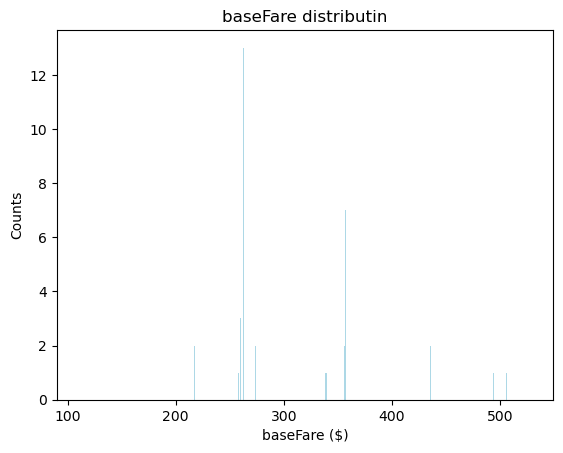

In [49]:
ax1 = histogram_df["baseFare"].plot(kind="hist", bins=500, facecolor='lightblue')
ax1.set_title('baseFare distributin')
ax1.set_xlabel('baseFare ($)')
ax1.set_ylabel('Counts')
plt.suptitle('')
plt.show()

In [24]:
# Теперь попробуем найти корреляцию между итоговой ценой и дистанцие полета (откуда мы заранее удалили все null)
# https://translated.turbopages.org/proxy_u/en-ru.ru.58f590be-65ff5fa6-7b9ed25a-74722d776562/https/www.statology.org/pyspark-correlation-between-two-columns/

In [82]:
def columnToIntegerType(dataframe, columName):
    new_df = dataframe.withColumn(columName, dataframe[columName].cast(IntegerType()))
    return new_df

def result_correlation(dataframe, columnName1, columnName2):
    connection = ""
    result = dataframe.stat.corr(columnName1, columnName2)
    if result < 0:
        connection = "отрицательная"
    elif result > 0:
        connection = "положительная"
    elif connection == 0:
        connection = "переменные полностью независимы друг от друга"
    print("Итоговая корреляция между значениями", columnName1, "и", columnName2 + ":", result)
    print("Связь между значениями", connection + ".")
    

In [83]:
#df = df.withColumn("totalFare", df["totalFare"].cast(IntegerType()))
#df = df.withColumn("totalTravelDistance", df["totalTravelDistance"].cast(IntegerType()))
#df.printSchema()
#print("Итоговая корреляция:")
#df.stat.corr('totalFare', 'totalTravelDistance')
# Этот конкретный код вернет значение от -1 до 1, которое представляет коэффициент корреляции 
# Пирсона между столбцом1 и столбцом2.
for columnName in ["totalFare", "elapsedDays", "baseFare", "seatsRemaining", "totalTravelDistance"]:
    df = columnToIntegerType(df, columnName)
#df = columnToIntegerType(df, "totalFare")
#df = columnToIntegerType(df, "totalTravelDistance")
result_correlation(df, "totalFare", "totalTravelDistance")
result_correlation(df, "totalFare", "elapsedDays")
result_correlation(df, "elapsedDays", "totalTravelDistance")

Итоговая корреляция между значениями totalFare и totalTravelDistance: -0.12960501397596252
Связь между значениями отрицательная.
Итоговая корреляция между значениями totalFare и elapsedDays: -0.008951514217738007
Связь между значениями отрицательная.
Итоговая корреляция между значениями elapsedDays и totalTravelDistance: 0.06191927840653521
Связь между значениями положительная.


In [84]:
df.select("baseFare", "totalFare", "seatsRemaining").summary().show()

+-------+-----------------+-----------------+-----------------+
|summary|         baseFare|        totalFare|   seatsRemaining|
+-------+-----------------+-----------------+-----------------+
|  count|               93|               93|               93|
|   mean|294.6666666666667|336.5376344086022|4.763440860215054|
| stddev|80.55626353178815|87.44110553865048|3.125622892572481|
|    min|              111|              133|                1|
|    25%|              260|              296|                1|
|    50%|              262|              305|                4|
|    75%|              357|              398|                7|
|    max|              528|              597|                9|
+-------+-----------------+-----------------+-----------------+

